In [3]:
# !pip install networkx

## Setup

In [4]:
import networkx as nx

## Graph

In [9]:
# create an undirected graph G
G = nx.Graph()
print(G.is_directed())
# create a directed graph H
H = nx.DiGraph()
print(H.is_directed())
# Add graph level attribute
G.graph['name'] = "Bar"
print(G.graph)

False
True
{'name': 'Bar'}


## Node

In [12]:
# add one node with node level attributes
G.add_node(0, feature=0, label=0)
# get attributes of the node 0
node_0_atrr = G.nodes[0]
print(f'Node 0 has the atrributes: {node_0_atrr}')

Node 0 has the atrributes: {'feature': 0, 'label': 0}


In [19]:
# Add multiple nodes with attributes
G.add_nodes_from([(1, {"feature": 1, "label": [1,2,3]}), (2, {"feature": 2, "label": 2})])
print(f'Node 0 has the atrributes: {G.nodes[1]}')
# Loop through all the nodes
# Set data=True will return node attributes
for node in G.nodes(data=True):
    print(node)
# Get number of node
num_nodes = G.number_of_nodes()
print(f"G has {num_nodes} nodes.")

Node 0 has the atrributes: {'feature': 1, 'label': [1, 2, 3]}
(0, {'feature': 0, 'label': 0})
(1, {'feature': 1, 'label': [1, 2, 3]})
(2, {'feature': 2, 'label': 2})
G has 3 nodes.


## Edge

In [24]:
# Add one edge with edge weight 0.5
G.add_edge(0, 1, weight=0.5)
# Get attribute of the edge (0,1)
edge_0_1_attr = G.edges[(0,1)]
print(f"Edge (0,1) has the attributes {edge_0_1_attr}.")

Edge (0,1) has the attributes {'weight': 0.5}.


In [31]:
# Add mutiple edges with edge weights
G.add_edges_from([(1,2, {'weight': 0.3}), (2,0, {'weight': 0.1})])
# Loop throgh all the edges
# add data=True to return weight
for edge in G.edges(data=True):
    print(edge)
    
print(f"G has {G.number_of_edges()} edges.")

(0, 1, {'weight': 0.5})
(0, 2, {'weight': 0.1})
(1, 2, {'weight': 0.3})
G has 3 edges.


## Visualization

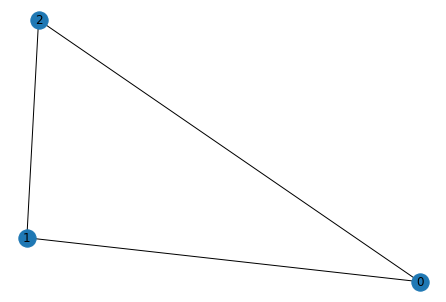

In [46]:
nx.draw(G, with_labels=True)

## Node degree and neighbor

In [50]:
node_id = 1
# degree of node 1
print(f"Node {node_id} has degree {G.degree[node_id]}")
# get neighbor of node 1
for neighbor in G.neighbors(node_id):
    print(f"Node {node_id} has neighbor {neighbor}.")

Node 1 has degree 2
Node 1 has neighbor 0.
Node 1 has neighbor 2.


## Other Functionalities

{0: 0.17857162031103999,
 1: 0.32142837968896,
 2: 0.32142837968896,
 3: 0.17857162031103999}

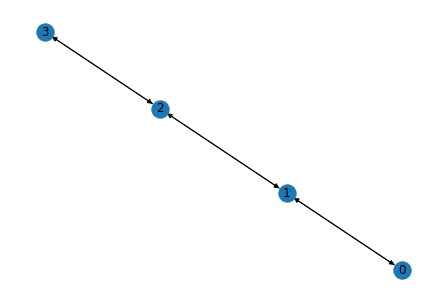

In [55]:
num_nodes = 4
# Create a new path like graph and change it to a directed graph
G = nx.DiGraph(nx.path_graph(num_nodes))
nx.draw(G, with_labels = True)

# Get the PageRank
pr = nx.pagerank(G, alpha=0.8)
pr

# PyTorch Geometric Tutorial

In [57]:
import torch
print("PyTorch has version {}".format(torch.__version__))

PyTorch has version 1.7.0


In [59]:
# Install torch geometric
# !pip install -q torch-scatter -f https://pytorch-geometric.com/whl/torch-1.7.0+cu101.html
# !pip install -q torch-sparse -f https://pytorch-geometric.com/whl/torch-1.7.0+cu101.html
# !pip install -q torch-geometric

In [60]:
# Helper function for visualization.
%matplotlib inline
import torch
import networkx as nx
import matplotlib.pyplot as plt

In [61]:
# Visualization function for NX graph or PyTorch tensor
def visualize(h, color, epoch=None, loss=None):
    plt.figure(figsize=(7,7))
    plt.xticks([])
    plt.yticks([])

    if torch.is_tensor(h):
        h = h.detach().cpu().numpy()
        plt.scatter(h[:, 0], h[:, 1], s=140, c=color, cmap="Set2")
        if epoch is not None and loss is not None:
            plt.xlabel(f'Epoch: {epoch}, Loss: {loss.item():.4f}', fontsize=16)
    else:
        nx.draw_networkx(G, pos=nx.spring_layout(G, seed=42), with_labels=False,
                         node_color=color, cmap="Set2")
    plt.show()

In [71]:
from torch_geometric.datasets import KarateClub

dataset = KarateClub()

print(f'Dataset {dataset}:')
print("===============")
print(f"Number of graphs: {len(dataset)}")
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

Dataset KarateClub():
Number of graphs: 1
Number of features: 34
Number of classes: 4


In [72]:
data = dataset[0]

In [77]:
# Gather some statistics about the graph.
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Number of training nodes: {data.train_mask.sum()}')
print(f'Training node label rate: {int(data.train_mask.sum()) / data.num_nodes:.2f}')
print(f'Contains isolated nodes: {data.contains_isolated_nodes()}')
print(f'Contains self-loops: {data.contains_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')

Number of nodes: 34
Number of edges: 156
Average node degree: 4.59
Number of training nodes: 4
Training node label rate: 0.12
Contains isolated nodes: False
Contains self-loops: False
Is undirected: True


In [80]:
data

Data(edge_index=[2, 156], train_mask=[34], x=[34, 34], y=[34])

In [81]:
edge_index = data.edge_index
edge_index

tensor([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,
          1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,
          3,  3,  3,  3,  3,  4,  4,  4,  5,  5,  5,  5,  6,  6,  6,  6,  7,  7,
          7,  7,  8,  8,  8,  8,  8,  9,  9, 10, 10, 10, 11, 12, 12, 13, 13, 13,
         13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 19, 20, 20, 21,
         21, 22, 22, 23, 23, 23, 23, 23, 24, 24, 24, 25, 25, 25, 26, 26, 27, 27,
         27, 27, 28, 28, 28, 29, 29, 29, 29, 30, 30, 30, 30, 31, 31, 31, 31, 31,
         31, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33,
         33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33],
        [ 1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 17, 19, 21, 31,  0,  2,
          3,  7, 13, 17, 19, 21, 30,  0,  1,  3,  7,  8,  9, 13, 27, 28, 32,  0,
          1,  2,  7, 12, 13,  0,  6, 10,  0,  6, 10, 16,  0,  4,  5, 16,  0,  1,
          2,  3,  0,  2, 30, 32, 33,  2, 33,  0,  4

In [82]:
data.train_mask

tensor([ True,  True, False, False, False, False, False, False,  True, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False,  True, False, False, False, False, False,
        False, False, False, False])

## Visualization

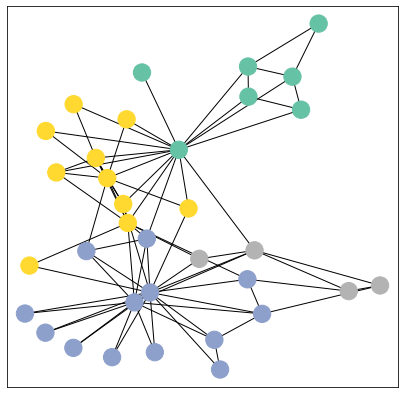

In [84]:
from torch_geometric.utils import to_networkx

G = to_networkx(data, to_undirected=True)
visualize(G, color=data.y)

In [85]:
import torch
from torch.nn import Linear
from torch_geometric.nn import GCNConv


class GCN(torch.nn.Module):
    def __init__(self):
        super(GCN, self).__init__()
        torch.manual_seed(12345)
        self.conv1 = GCNConv(dataset.num_features, 4)
        self.conv2 = GCNConv(4, 4)
        self.conv3 = GCNConv(4, 2)
        self.classifier = Linear(2, dataset.num_classes)

    def forward(self, x, edge_index):
        h = self.conv1(x, edge_index)
        h = h.tanh()
        h = self.conv2(h, edge_index)
        h = h.tanh()
        h = self.conv3(h, edge_index)
        h = h.tanh()  # Final GNN embedding space.
        
        # Apply a final (linear) classifier.
        out = self.classifier(h)

        return out, h

model = GCN()
print(model)

GCN(
  (conv1): GCNConv(34, 4)
  (conv2): GCNConv(4, 4)
  (conv3): GCNConv(4, 2)
  (classifier): Linear(in_features=2, out_features=4, bias=True)
)


Embedding shape: [34, 2]


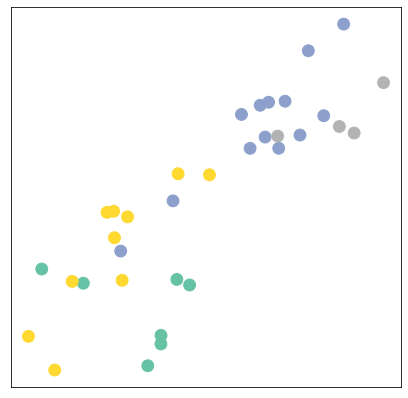

In [87]:
model = GCN()

_, h = model(data.x, data.edge_index)
print(f'Embedding shape: {list(h.shape)}')

visualize(h, color=data.y)

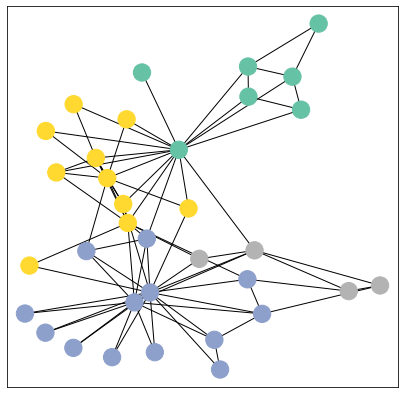

In [88]:
visualize(G, color=data.y)

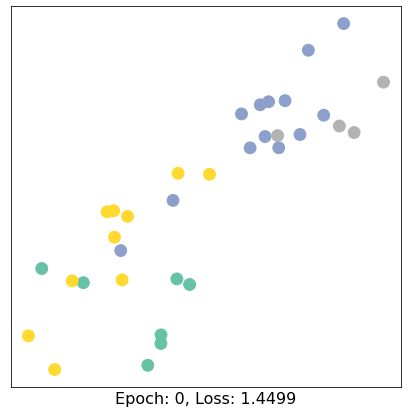

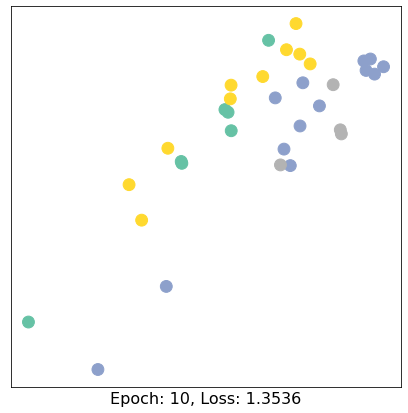

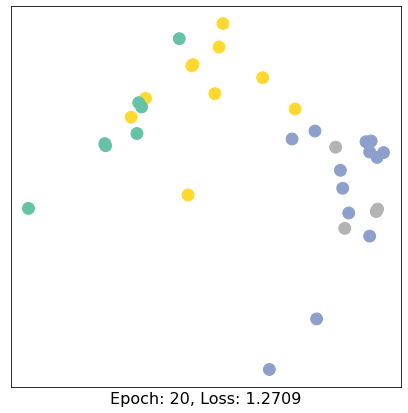

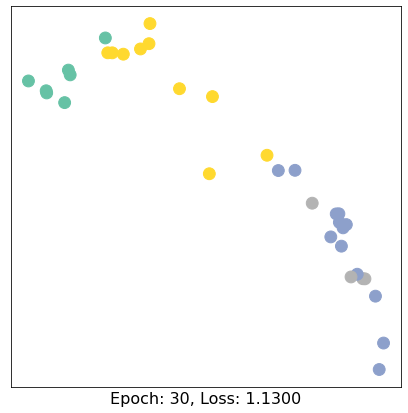

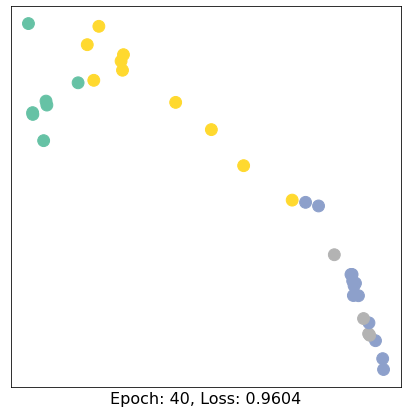

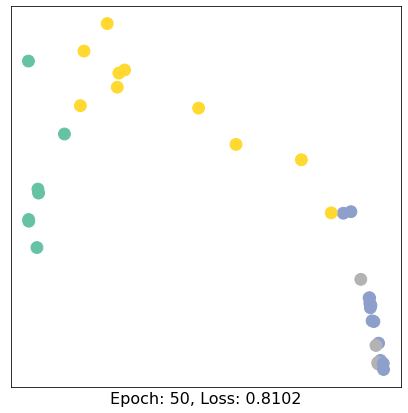

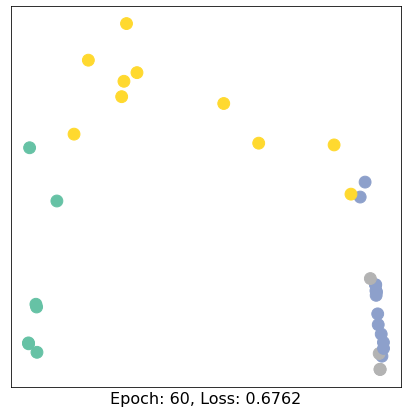

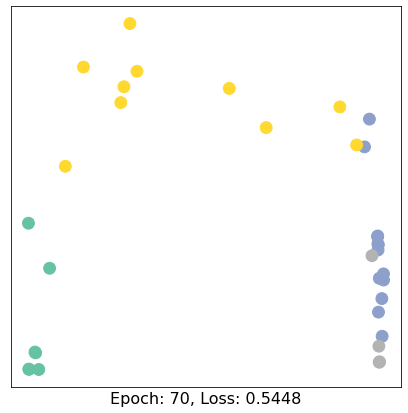

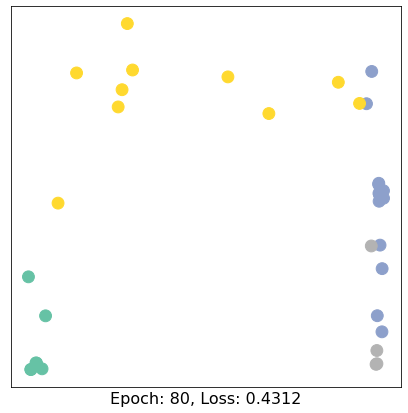

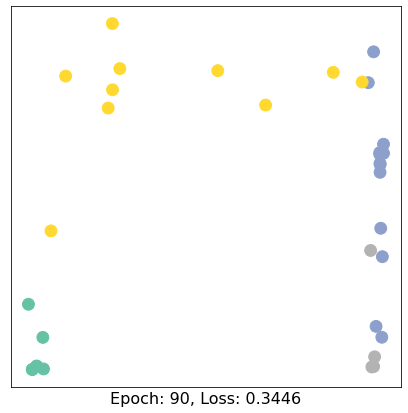

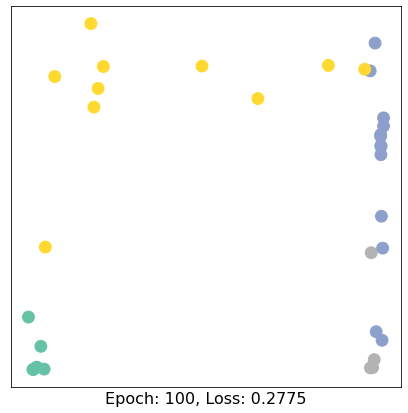

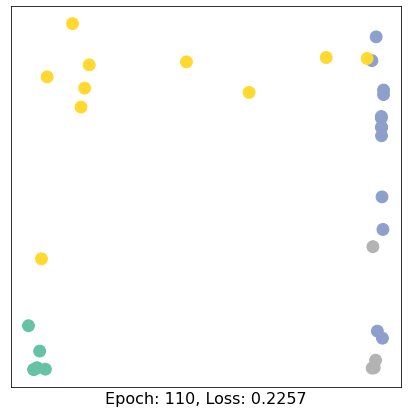

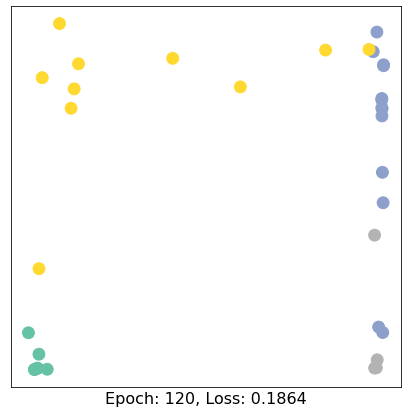

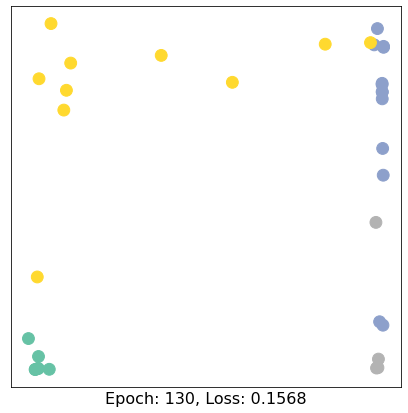

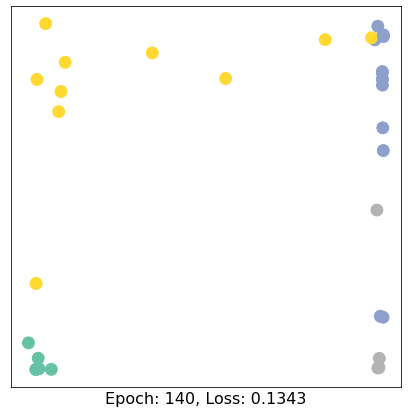

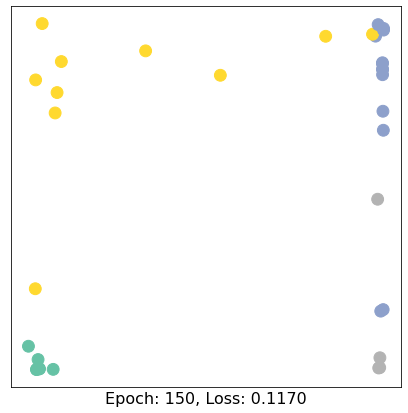

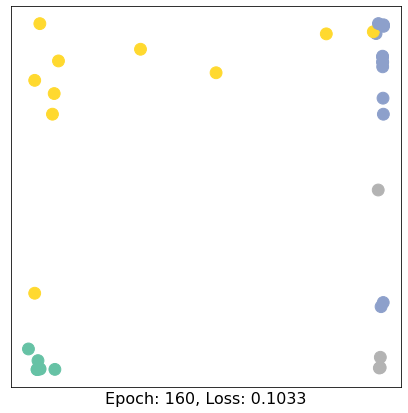

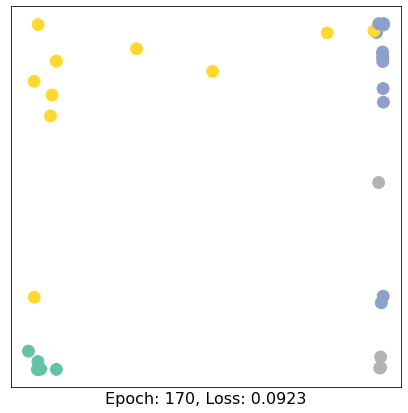

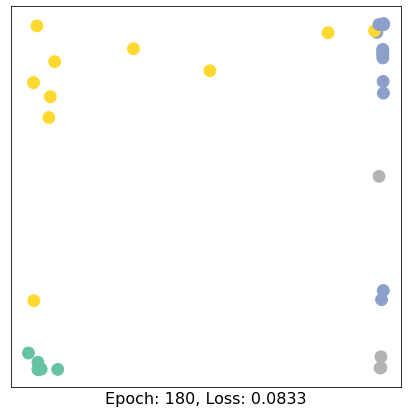

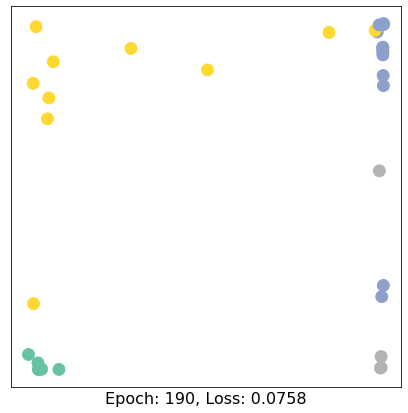

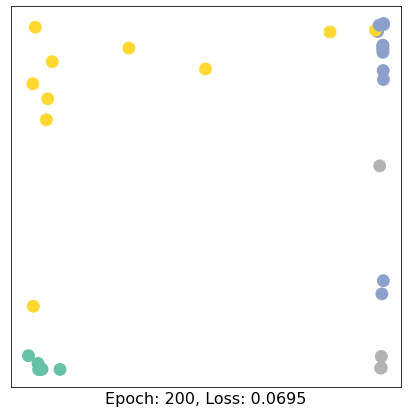

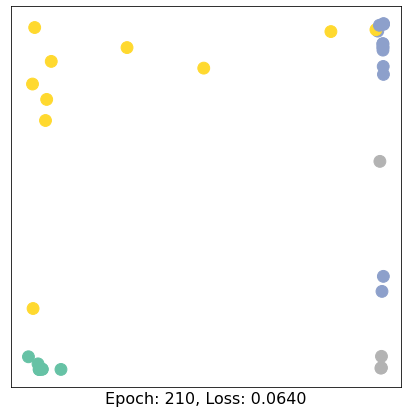

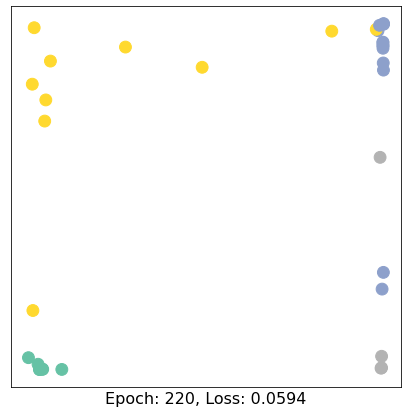

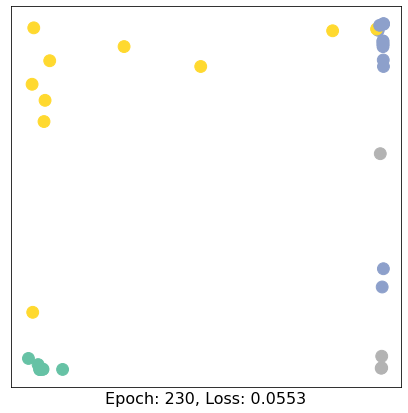

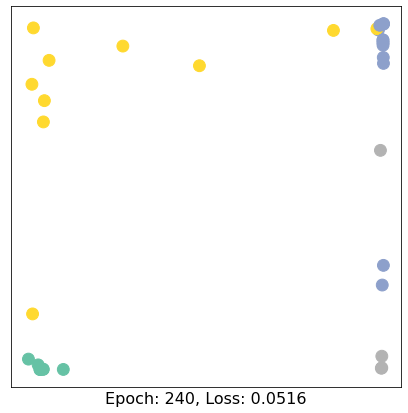

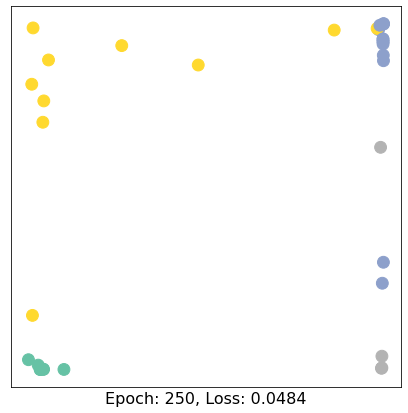

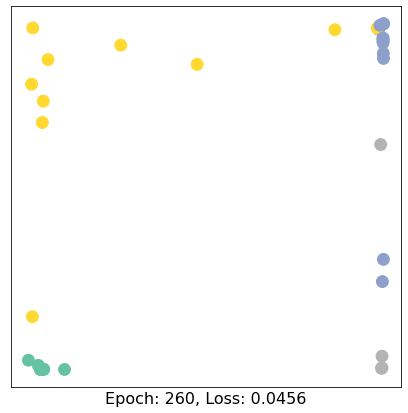

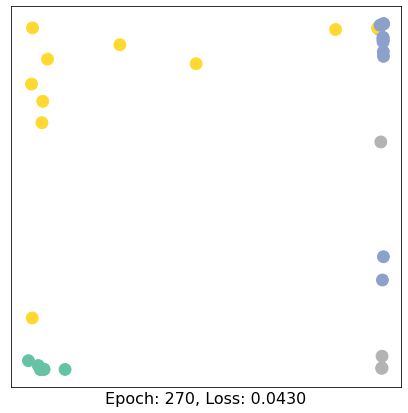

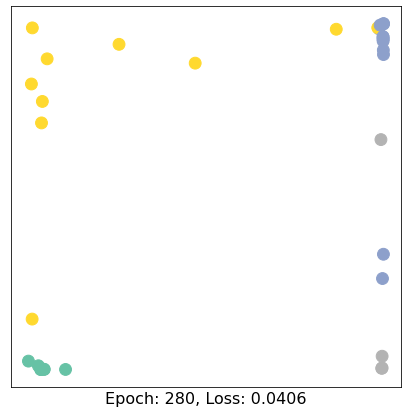

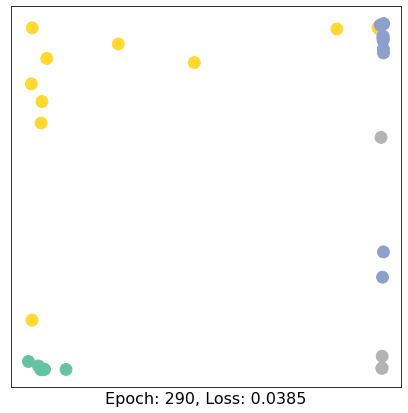

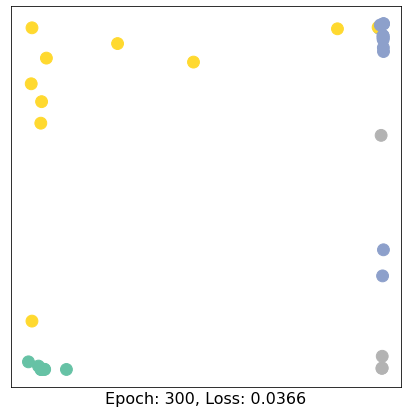

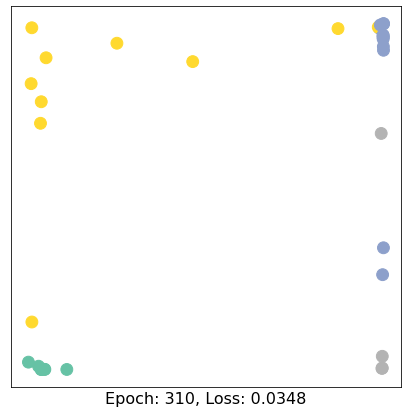

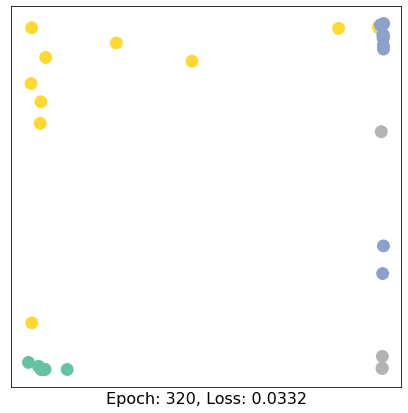

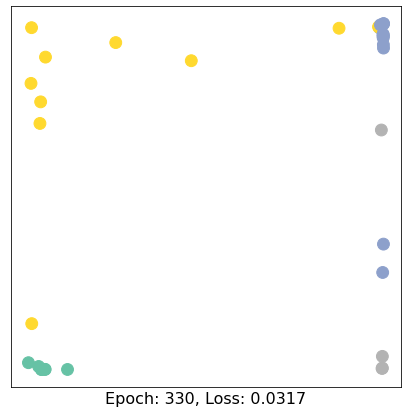

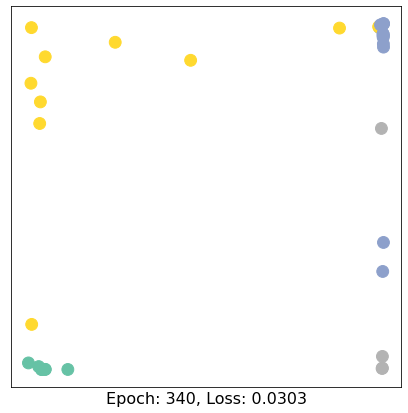

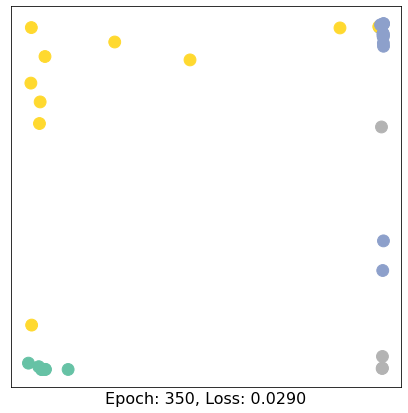

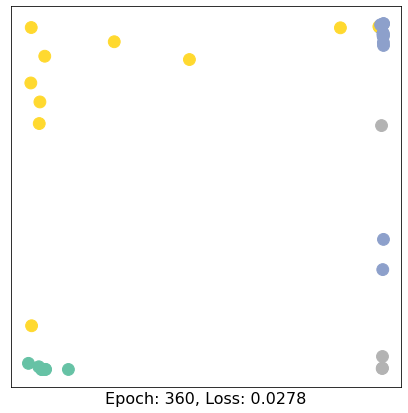

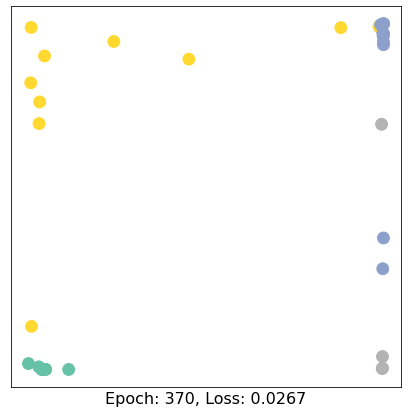

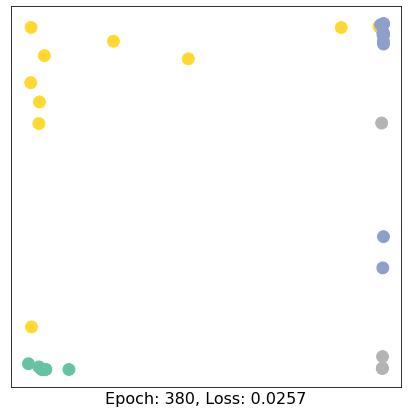

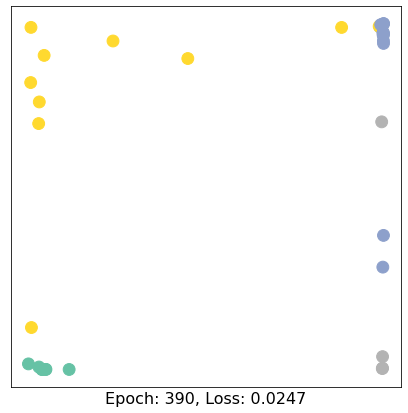

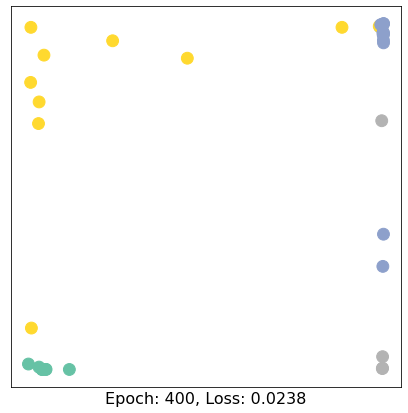

In [89]:
import time

model = GCN()
criterion = torch.nn.CrossEntropyLoss()  # Define loss criterion.
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)  # Define optimizer.

def train(data):
    optimizer.zero_grad()  # Clear gradients.
    out, h = model(data.x, data.edge_index)  # Perform a single forward pass.
    loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Compute the loss solely based on the training nodes.
    loss.backward()  # Derive gradients.
    optimizer.step()  # Update parameters based on gradients.
    return loss, h

for epoch in range(401):
    loss, h = train(data)
    # Visualize the node embeddings every 10 epochs
    if epoch % 10 == 0:
        visualize(h, color=data.y, epoch=epoch, loss=loss)
        time.sleep(0.3)